<a href="https://colab.research.google.com/github/sainathnallagonda/LoanTap-Logistic-Regression/blob/main/LoanTap_Logistic_Regression(sainath)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LoanTap - Logistic Regression**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.
The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
*   Personal Loan
*   EMI Free Loan
*   Personal Overdraft
*   Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Importing Libraries

In [622]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score # To decide on the best performing model
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor # Multicolinearity?
from imblearn.over_sampling import SMOTE # Oversampling


In [623]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 247MB/s] 


In [624]:
df = pd.read_csv('logistic_regression.csv')

In [625]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [626]:
df.shape

(396030, 27)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [628]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [629]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


There are null values in 6 columns in which 3 are numerical and 3 are categorical. categorical columns can be filled with mode and numerical can be filled with mean of their respective columns

In [630]:
df.loan_status.value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


<Axes: >

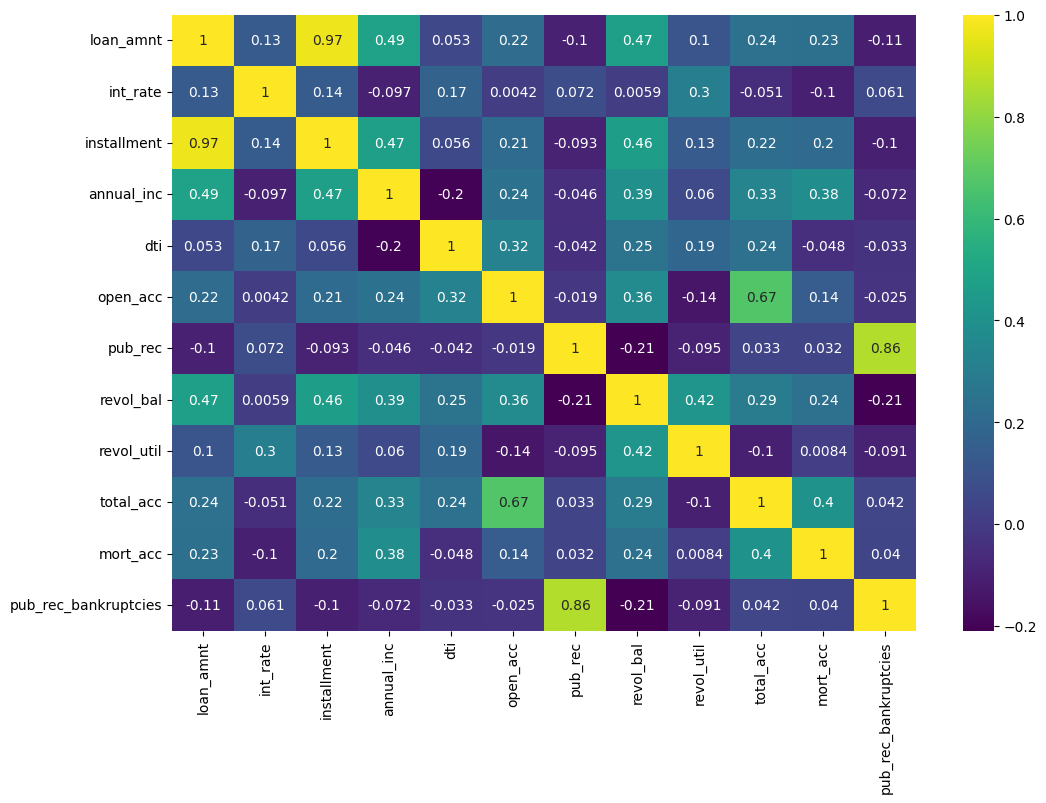

In [631]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='viridis')

From the above heat map we can see almost perfect correlation between "loan_amnt" the "installment" feature.

In [632]:
#dropping installment feature
df.drop(columns=['installment'], axis=1, inplace=True)

In [633]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [634]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


Combining NONE and ANY into OTHER

In [635]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


In [636]:
df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,123
Charged Off,23


In [637]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [638]:
df['title'].value_counts()[:20]

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
Major purchase,4769
Consolidation,3852
debt consolidation,3547
Business,2949


In [639]:
df['title'] = df.title.str.lower()

**Data Visualization**

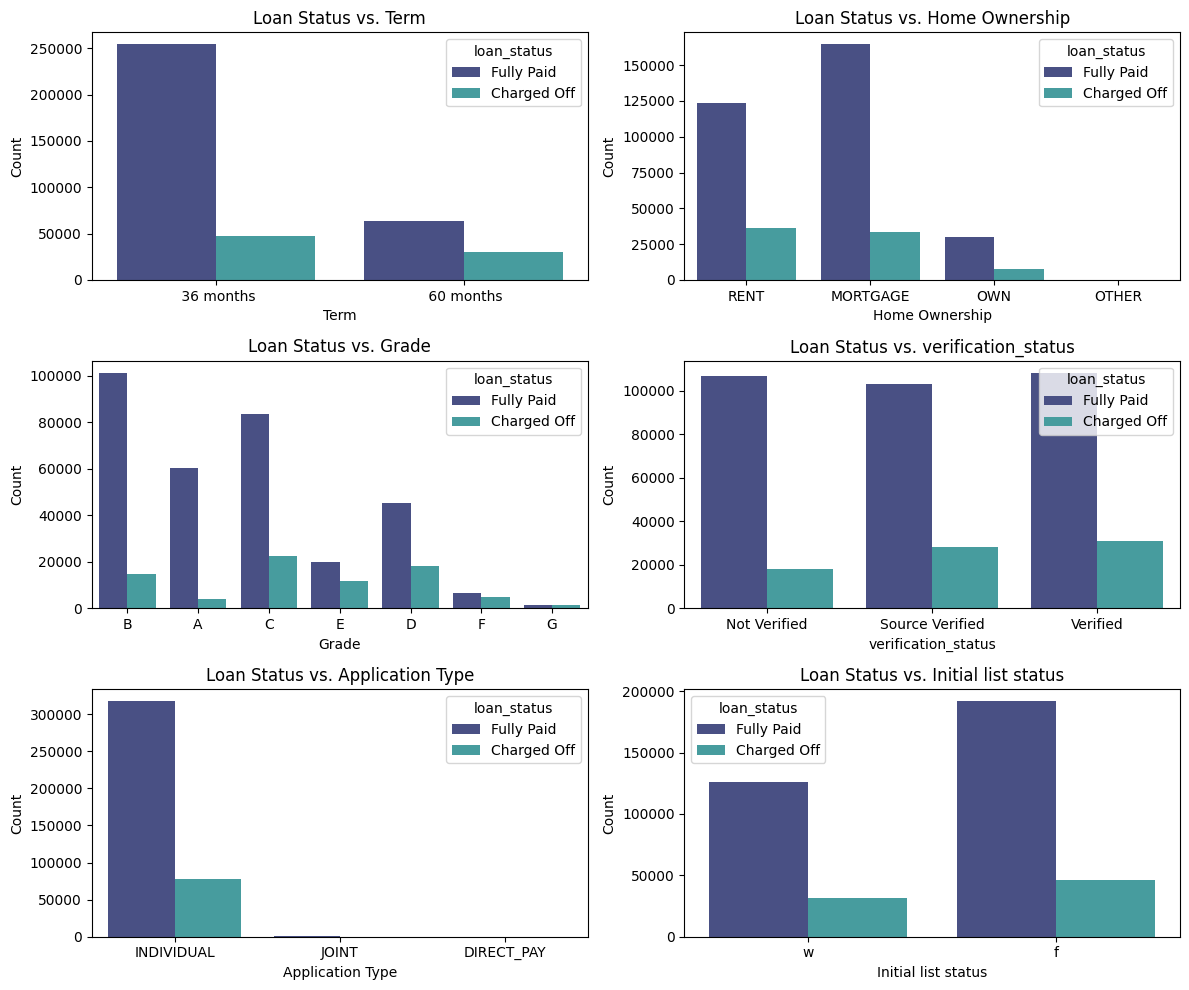

In [640]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.countplot(x='term', hue='loan_status', data=df, ax=axes[0,0], palette='mako')
axes[0,0].set_title('Loan Status vs. Term')
axes[0,0].set_xlabel('Term')
axes[0,0].set_ylabel('Count')

sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axes[0,1], palette='mako')
axes[0,1].set_title('Loan Status vs. Home Ownership')
axes[0,1].set_xlabel('Home Ownership')
axes[0,1].set_ylabel('Count')

sns.countplot(x='grade', hue='loan_status', data=df, ax=axes[1,0], palette='mako')
axes[1,0].set_title('Loan Status vs. Grade')
axes[1,0].set_xlabel('Grade')
axes[1,0].set_ylabel('Count')

sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axes[1,1], palette='mako')
axes[1,1].set_title('Loan Status vs. verification_status')
axes[1,1].set_xlabel('verification_status')
axes[1,1].set_ylabel('Count')

sns.countplot(x='application_type', hue='loan_status', data=df, ax=axes[2,0], palette='mako')
axes[2,0].set_title('Loan Status vs. Application Type')
axes[2,0].set_xlabel('Application Type')
axes[2,0].set_ylabel('Count')

sns.countplot(x='initial_list_status', hue='loan_status', data=df, ax=axes[2,1], palette='mako')
axes[2,1].set_title('Loan Status vs. Initial list status')
axes[2,1].set_xlabel('Initial list status')
axes[2,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


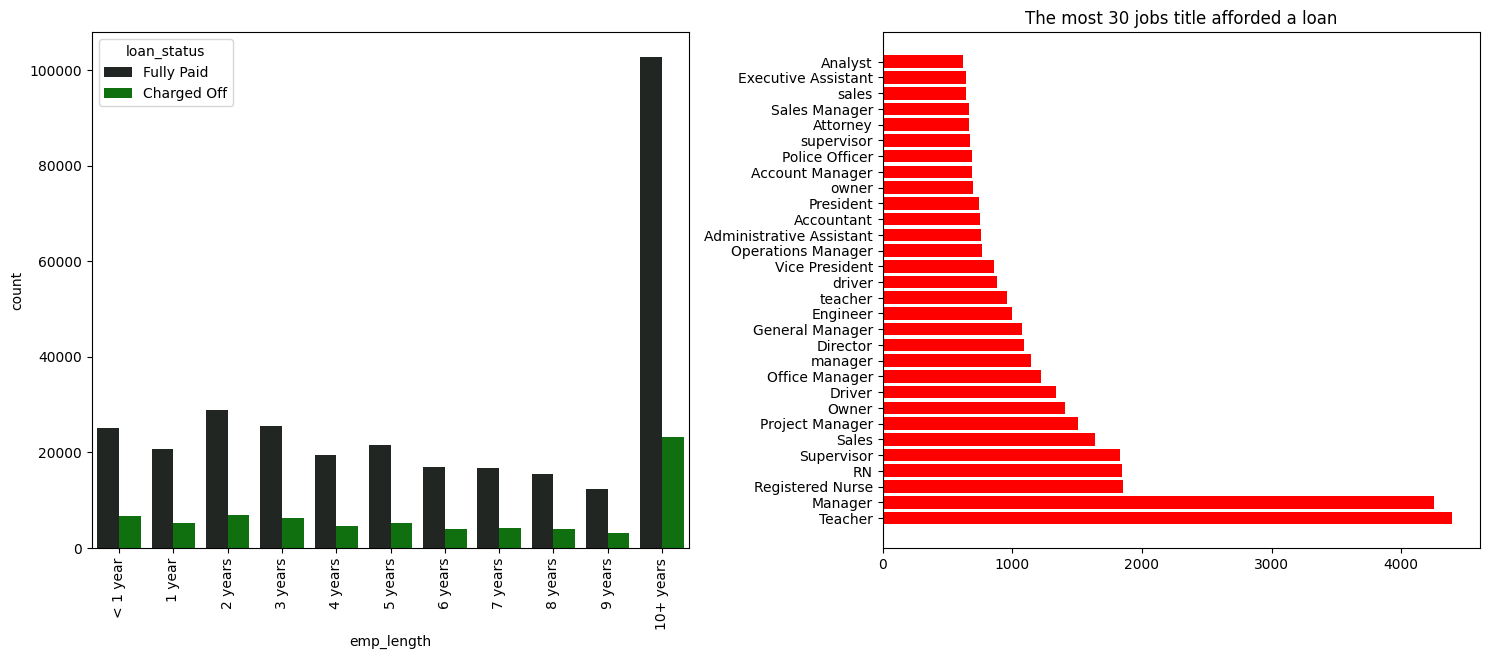

In [641]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order,color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30],color='red')
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

**Observations:**
- More people take loans for 36 months than for 60 months.

- Most people who take loans have a house under mortgage, followed by those who rent, and then those who own their house. Other types are very few.

- The number of people in each verification status group is almost the same.

- Most loan applications are from individuals, not joint applications.

- Grade B has the highest number of people who have fully paid their loans.

- In Grade B, sub-grade B3 has the most people who paid off their loans.

- Very few people fall under Grade G.

- Sub-grade A1 has the least number of defaulters, which means people in this group are more reliable

**Data Preprocessing using Feautre Engineering**

In [642]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1 # Whether someone has public derogatory records or not (flag)

def mort_acc(number):
    if number == 0.0:
        return 0
    else:
        return 1


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    else:
        return 1

In [643]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

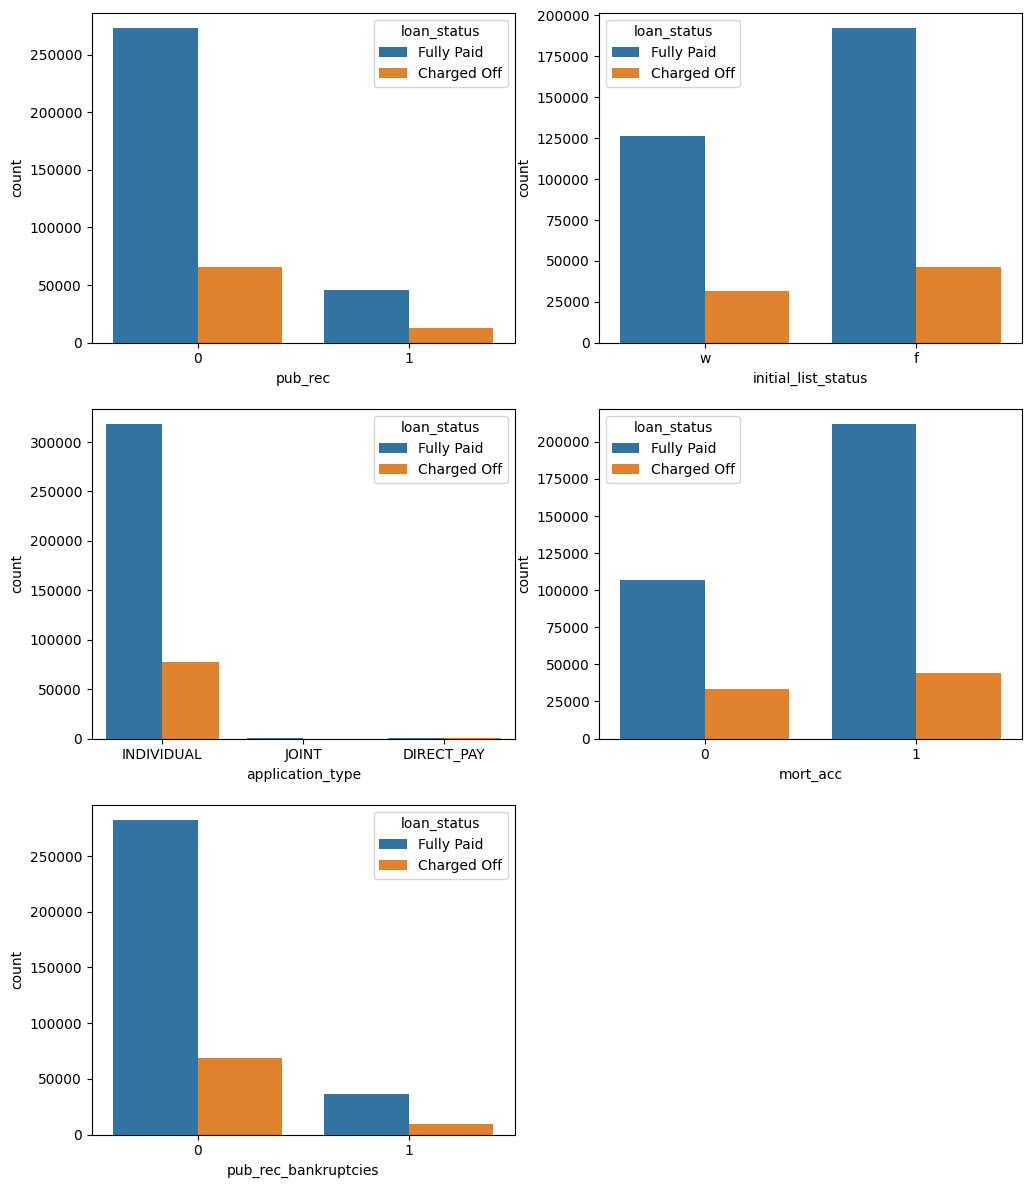

In [644]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

plt.show()

In [645]:
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [646]:
numeric_df.drop(columns=['installment'], axis=1, inplace=True)

In [647]:
numeric_df=numeric_df.groupby(by='total_acc').mean()

In [648]:
numeric_df.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,
2.0,6672.222222,15.801111,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480
4.0,7587.399031,15.069491,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951
5.0,7845.734714,14.917564,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171
6.0,8529.019843,14.651752,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077


In [649]:
total_acc_avg = numeric_df.groupby(by='total_acc').mean().mort_acc


In [650]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [651]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [652]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0
verification_status,0


In [653]:
df.shape

(396030, 26)

In [654]:
df.dropna(inplace=True)

In [655]:
df.shape

(371125, 26)

In [656]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

12

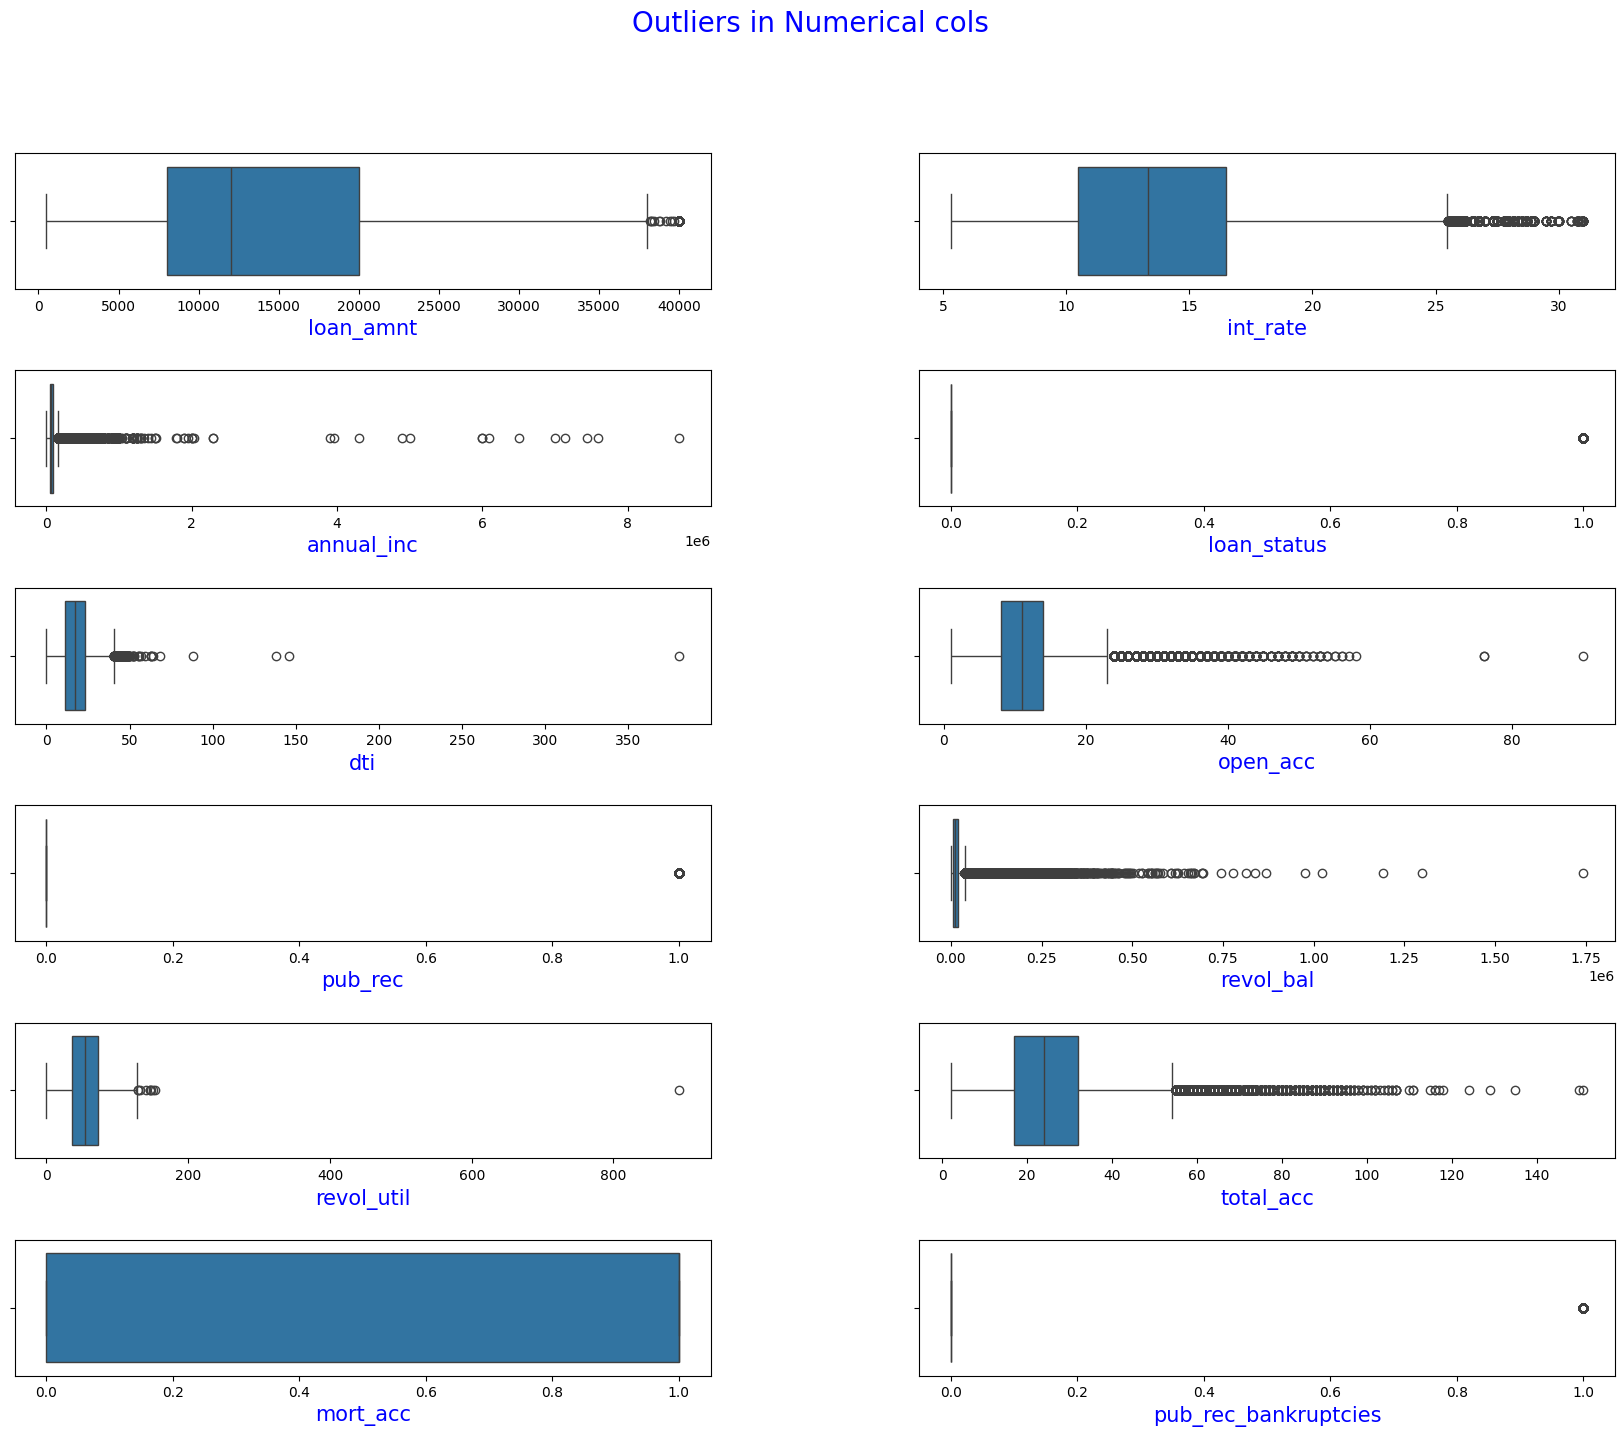

In [657]:
fig = plt.figure(figsize=(20,18))
for i,col in enumerate(num_cols):
    plt.subplot(int(len(num_cols)/2 +1), 2, i+1)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.6)
    sns.boxplot(x=df[col] )
    plt.xlabel(col,fontsize =15, color = 'blue')
    #plt.ylabel("count of bikes", fontsize = 15, color = 'blue')
fig.suptitle("Outliers in Numerical cols ", fontsize= 20, color = 'blue')
plt.show()

In [658]:
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

(355004, 26)

In [659]:
df['term']=df['term'].str.strip()
map = {'36 months':36,'60 months':60}
df['term']=df['term'].map(map)

In [660]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [661]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [662]:
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [663]:
df['zip_code'].value_counts(normalize=True)*100

,proportion
zip_code,
70466,14.378711
30723,14.282656
22690,14.269135
48052,14.125193
00813,11.611982
29597,11.537053
05113,11.517053
93700,2.773772
11650,2.771236


In [664]:
#dropping unnecessary columns
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

**Encoding**

In [665]:
dummies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [666]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [667]:
df.shape

(355004, 49)

**Splitting the data into train and test**

In [668]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [669]:
X.shape

(355004, 48)

In [670]:
y.shape

(355004,)

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y, random_state=42)

In [672]:
print(X_train.shape)
print(X_test.shape)

(248502, 48)
(106502, 48)


In [673]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [674]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [675]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.891


In [676]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85434   576]
 [11071  9421]]


The accuracy of our first model is 89.11%, which looks good. But since our dataset is imbalanced, accuracy alone might not give the full picture. In such cases, accuracy can be misleading. So, we will look at some other evaluation metrics to better understand how well our model is performing.

In [677]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve,confusion_matrix


In [678]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     86010
           1       0.94      0.46      0.62     20492

    accuracy                           0.89    106502
   macro avg       0.91      0.73      0.78    106502
weighted avg       0.90      0.89      0.87    106502



**ROC Curve**

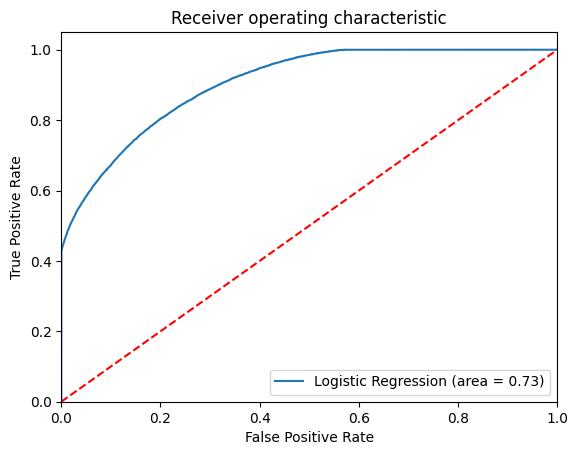

In [679]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # Actual Values and predicted categories
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) # Actual values and the probability values
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Precision-Recall Curve**

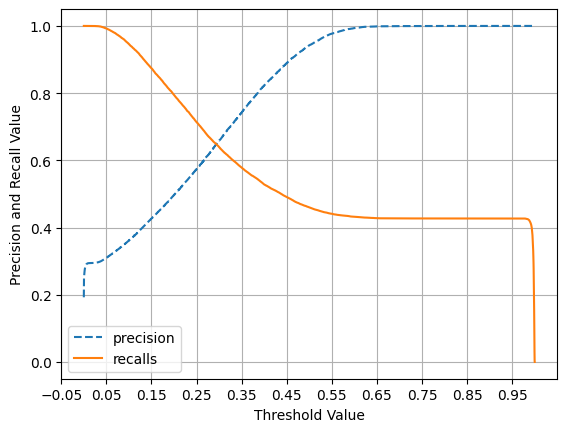

In [680]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

In [681]:
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(logreg, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.891


In [682]:
from imblearn.over_sampling import SMOTE

In [683]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [684]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (401374, 48)
After OverSampling, the shape of train_y: (401374,) 

After OverSampling, counts of label '1': 200687
After OverSampling, counts of label '0': 200687


In [685]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     86010
           1       0.49      0.80      0.61     20492

    accuracy                           0.80    106502
   macro avg       0.72      0.80      0.74    106502
weighted avg       0.86      0.80      0.82    106502



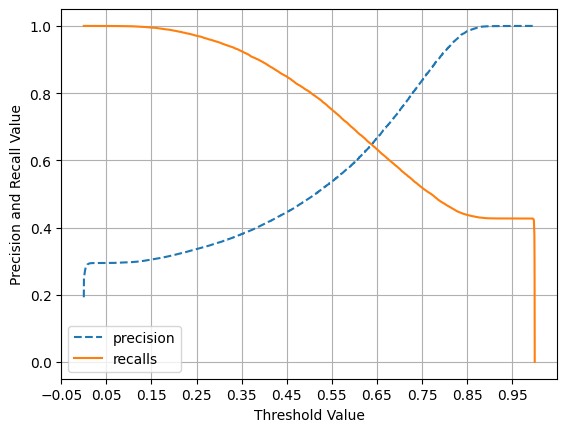

In [686]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

**Insights**
- More people prefer 36-month loans over 60-month loans.
- Loan distribution based on homeownership follows the order: Mortgage > Rent > Own, with fewer borrowers in other categories.
- Verification status remains balanced across different customer groups.
- Individual loan applications are the most common.
- Most borrowers in Grade B have successfully repaid their loans, with sub-grade B3 having the highest repayment rate.
- Only a small number of borrowers fall under Grade G.
- The lowest default rate is observed in sub-grade A1, indicating reliable borrowers.
- Precision for predicting debtors (class 0) is high.
- Precision for identifying defaulters (class 1) is also strong, with a 94% chance that predicted defaulters are indeed defaulters.
- Sensitivity for debtors is high, but sensitivity for defaulters is lower, leading to more false negatives, as confirmed by the confusion matrix.
- Teachers, managers, nurses, and supervisors are among the most frequent loan applicants.


**Recommendations**
- Implement strict monitoring for high-interest loans, as they have a 40% default risk.
- Promote low-interest loans, as their probability of repayment exceeds 90%.
- Encourage joint loans, as they have the highest likelihood of full repayment.
- Offer flexible loan terms to help customers align payments with their income levels.
- Target high-earning job roles for loan distribution, as repayment expectations are stronger.
- Maintain rigorous approval processes for loans related to education, medical needs, and other essential purposes to build customer trust.
- Use alternative credit assessment methods like utility payment history and spending behavior to minimize defaults.
- Strengthen partnerships with credit bureaus to improve borrower evaluations and reduce risk.
- Regularly update loan policies to ensure compliance with regulatory standards and enhance loan disbursement strategies.
